In [1]:
# Clustering and PCA Machine Learning Assignment - Assignment Part 1
# Author: Ashutosh Kumar
# Contact Details: Phone: +91-8904866645, Email: ashutoshind2017@outlook.com

In [2]:
# Problem Statement:

# HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of 
# backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of 
# operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

# After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide
# how to use this money strategically and effectively. The significant issues that come while making this decision are mostly 
# related to choosing the countries that are in the direst need of aid. 

# And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health
# factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to 
# focus on the most. 

In [3]:
# ######################################### Assignmnet Part 1 Starts here ################################################

In [4]:
# Importing required python libraries, functions etc which will be used for this assignment 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Suppressing warnings:
import warnings
warnings.filterwarnings("ignore") 

#Importing the PCA module
from sklearn.decomposition import PCA

In [5]:
# Step 1: Reading and Understanding the Data:
# Let's start with the following steps:

# Importing data using the pandas library:

country_df = pd.read_csv("Country-data.csv")

In [6]:
# Having first glance of country data:

country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
#Examining the data frame for the shape:

print(country_df.shape)

(167, 10)


In [8]:
# So the dataframe has 167 columns and 10 rows

In [9]:
#Examining the data frame to understand What type of values are stored in the columns:
print(country_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB
None


In [10]:
# Hence, out of 10 columns, 9 columns have numerical data type(float64,int64) already

In [11]:
#Finding the null percentage of the data set for all columns:
#(Find the percentage of missing values for all the columns)

print(round(100*(country_df.isnull().sum(axis=0)/len(country_df.index)),2))

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64


In [12]:
# From above result, no missing value treatment is needed in our dataset as there are no NUlls in our data 

In [13]:
# Finding the datatypes of the columns/variables:
print(country_df.dtypes)

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object


In [14]:
# Column format conversion as per the Data Dcitionary::

# Some of the numerical columns are in relative percentages of GDDP and needs to be converted into the actual number:

country_df['exports'] = country_df['exports']*country_df['gdpp']/100
country_df['health'] = country_df['health']*country_df['gdpp']/100
country_df['imports'] = country_df['imports']*country_df['gdpp']/100

In [15]:
# Re-checking the dataframe after the above conversion:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [16]:
# Checking the distribution of numerical variables in the dataset (statistical information) :
# Checking outliers at 25%,50%,75%,90%,95% and 99% as well: 

print(country_df.describe(percentiles=[.25,.5,.75,.90,.95,.99]))

       child_mort        exports       health        imports         income  \
count  167.000000     167.000000   167.000000     167.000000     167.000000   
mean    38.270060    7420.618847  1056.733204    6588.352108   17144.688623   
std     40.328931   17973.885795  1801.408906   14710.810418   19278.067698   
min      2.600000       1.076920    12.821200       0.651092     609.000000   
25%      8.250000     447.140000    78.535500     640.215000    3355.000000   
50%     19.300000    1777.440000   321.886000    2045.580000    9960.000000   
75%     62.100000    7278.000000   976.940000    7719.600000   22800.000000   
90%    100.220000   17760.600000  3825.416000   15034.280000   41220.000000   
95%    116.000000   31385.100000  4966.701000   24241.560000   48290.000000   
99%    153.400000   64794.260000  8410.330400   55371.390000   84374.000000   
max    208.000000  183750.000000  8663.600000  149100.000000  125000.000000   

        inflation  life_expec   total_fer          

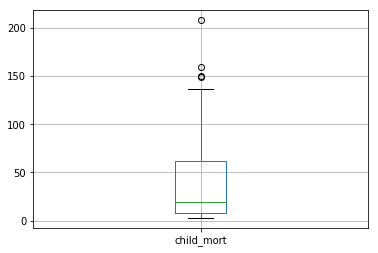

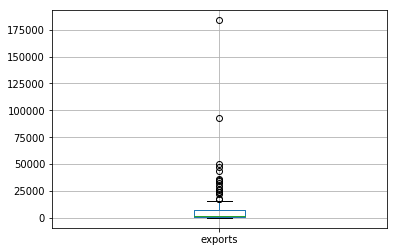

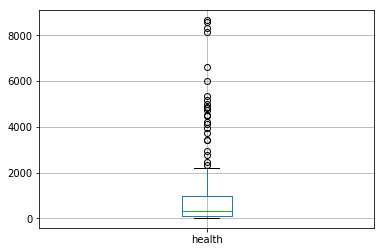

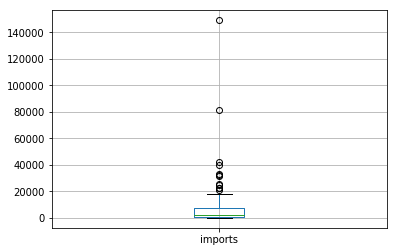

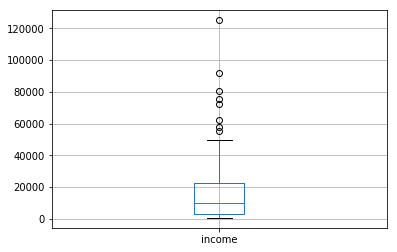

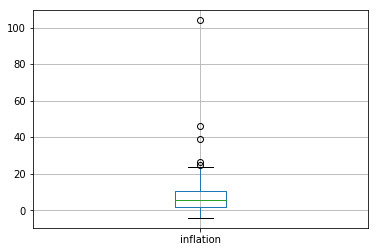

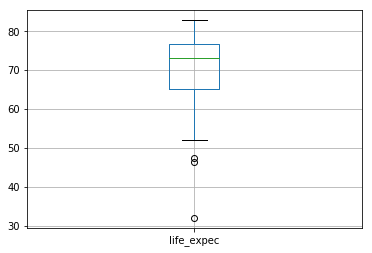

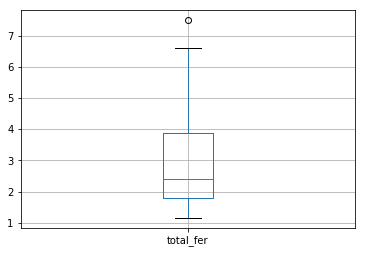

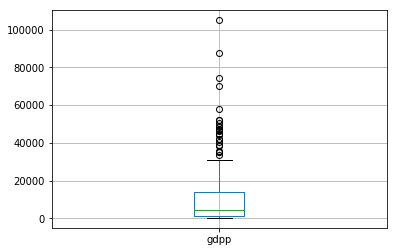

In [17]:
# Outlier detection in the dataset:

# Identifying the data columns which are numerical:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = country_df.select_dtypes(include=numerics)

for column in numeric_df:
    plt.figure()
   # numeric_df.plot(kind='box')
    numeric_df.boxplot([column])

In [18]:
# Inference:

# As we can see from above boxplots of numerical columns, there are few outliers namely for the columns child_mort, exports,
# health, imports , income, inflation, life_expec,gdpp etc.

# We will deal with the same after performing PCA on the same if needed.

In [19]:
country_df_only = country_df['country']
country_df_only.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

In [20]:
# We need to scale the continuous variables(features) as they may be of the different magnitude:

# Creating new data frame with only numerical attribute:
numeric_df = country_df._get_numeric_data()
numeric_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


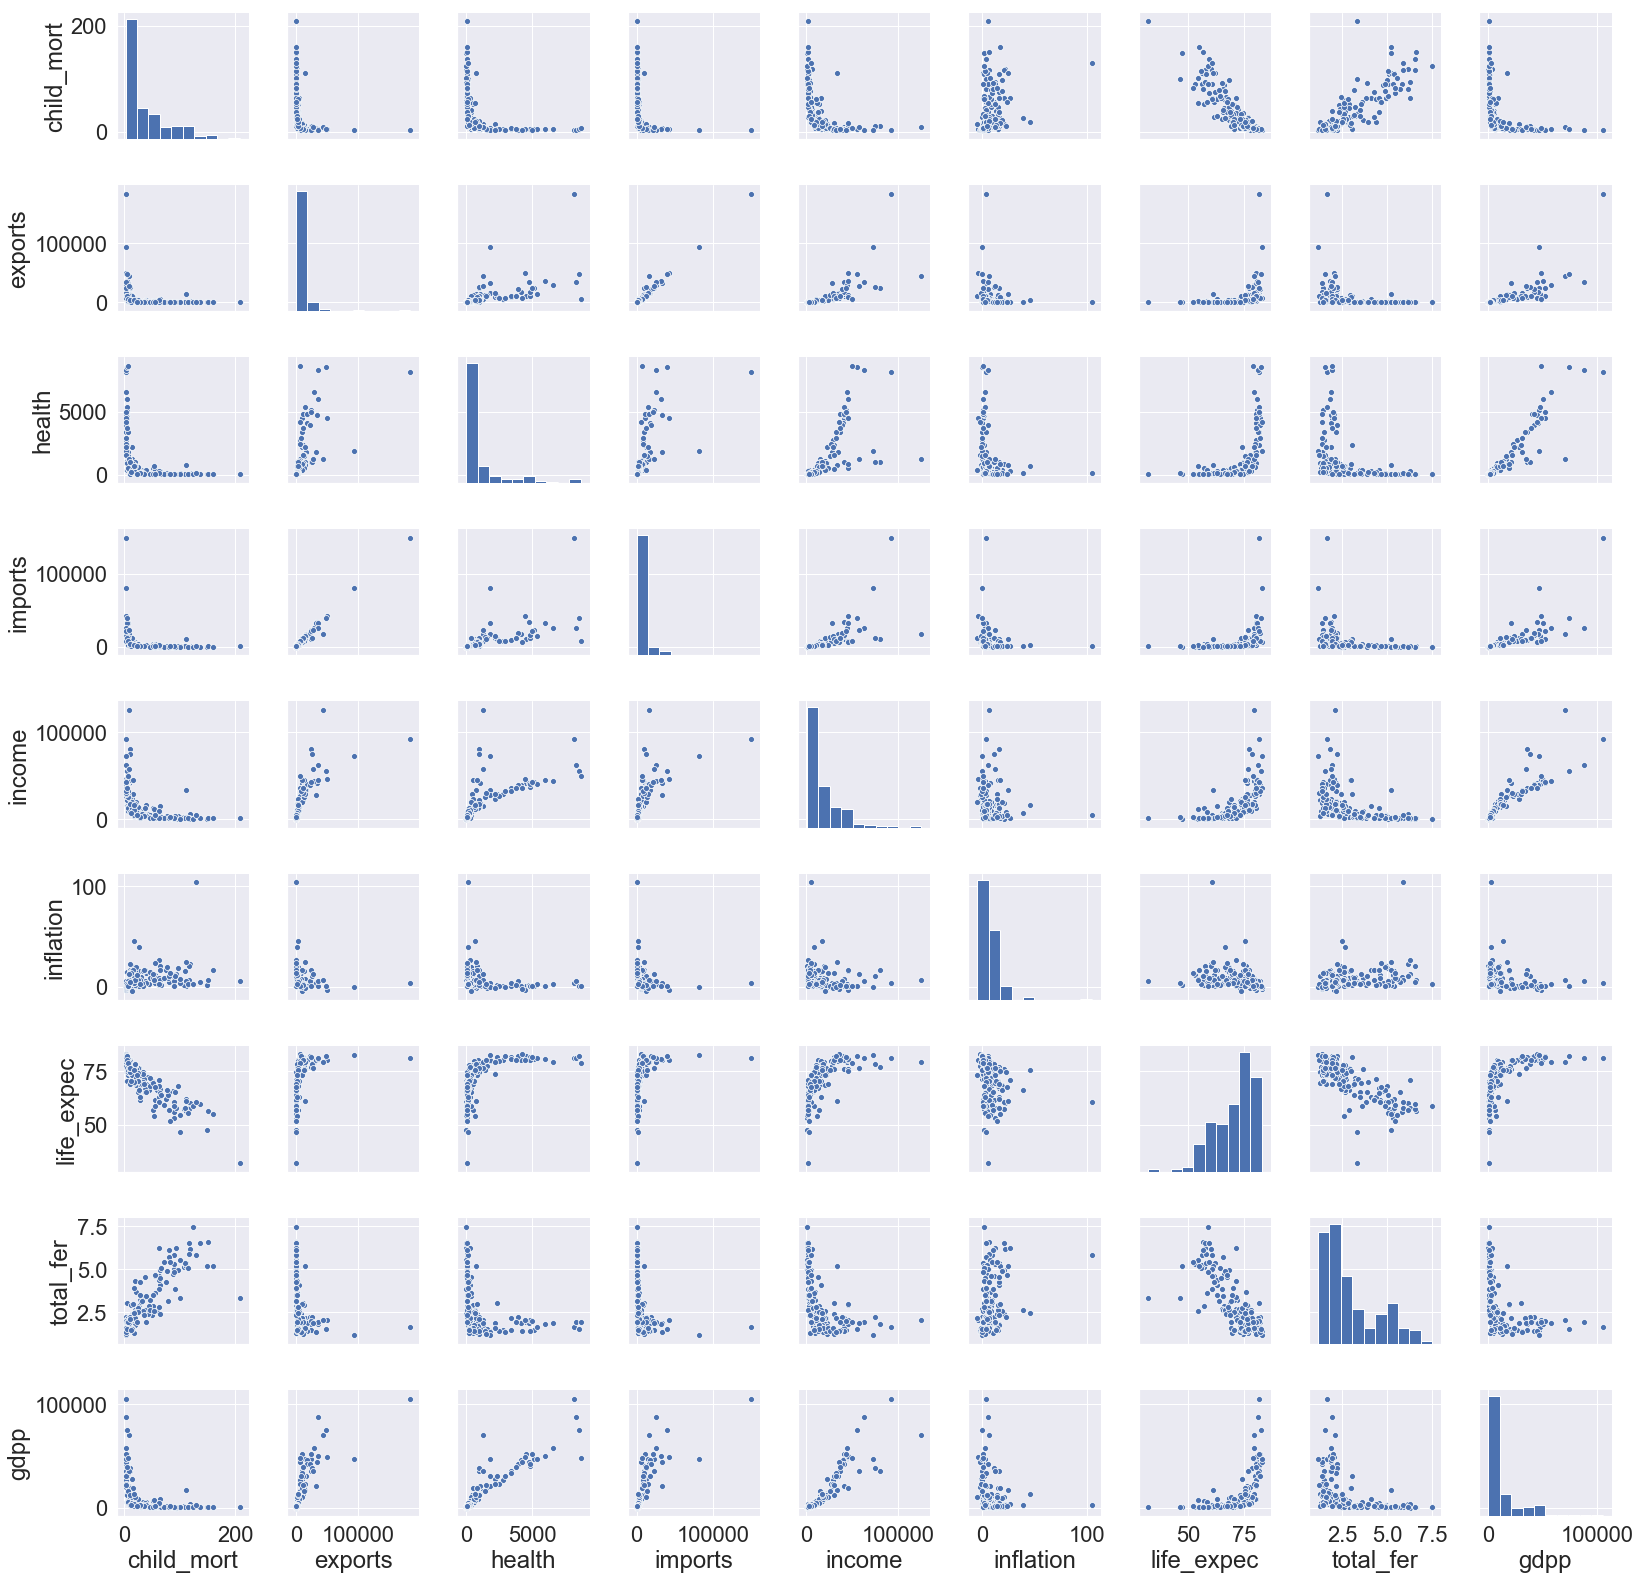

In [21]:
# Visualising all the numerical variables using the pairplot:

car_corr = numeric_df.corr() 
sns.set(font_scale=2) 
sns.pairplot(numeric_df,palette="husl") 
plt.show()

In [22]:
# instantiate:
standard_scaler = StandardScaler()

# fit_transform:
country_numeric_array = standard_scaler.fit_transform(numeric_df)

# Checking the shape as its ndarray now:
country_numeric_array.shape

(167, 9)

In [23]:
# So this is 167*9 Array of numerical variables

# checking the value of the array:

country_numeric_array

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [24]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [25]:
# Performing the PCA on the data:

pca.fit(country_numeric_array)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [26]:
#List of PCA components:

pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [27]:
#Let's check the variance ratios:

pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

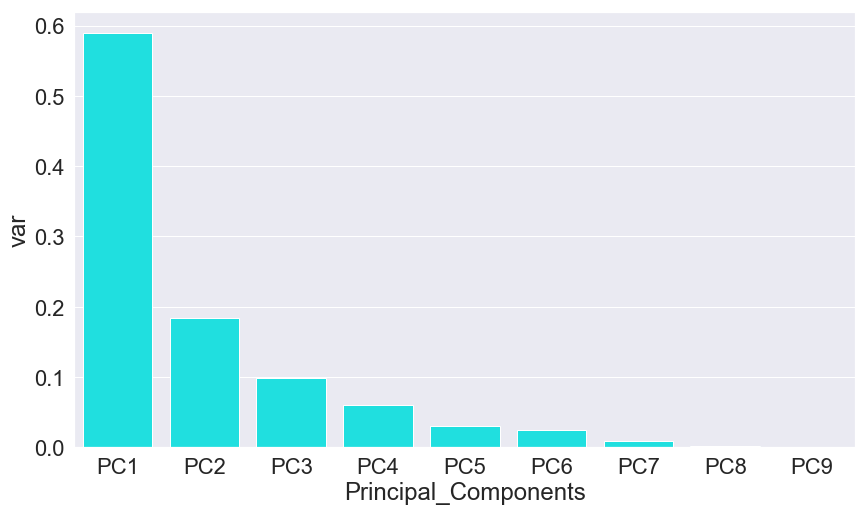

In [28]:
plt.figure(figsize=(14,8))

df_EVR = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'Principal_Components':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']})
sns.barplot(x='Principal_Components',y="var", 
           data=df_EVR, color="cyan");

In [29]:
# The explained variance tells how much information (variance) can be attributed to each of the principal components. 
# This is important as while you can convert n dimensional space to lesser dimensional space, you lose some of the variance 
# (information) when you do this. By using the attribute explained_variance_ratio_, we can see that the 1st principal 
# component contains 58.89% of the variance,2nd principal component contains 18.44% of the variance, 3rd 9.91% and 4th 6.07% of 
# the variance.
# Together, the four components contain around 94% of the information.

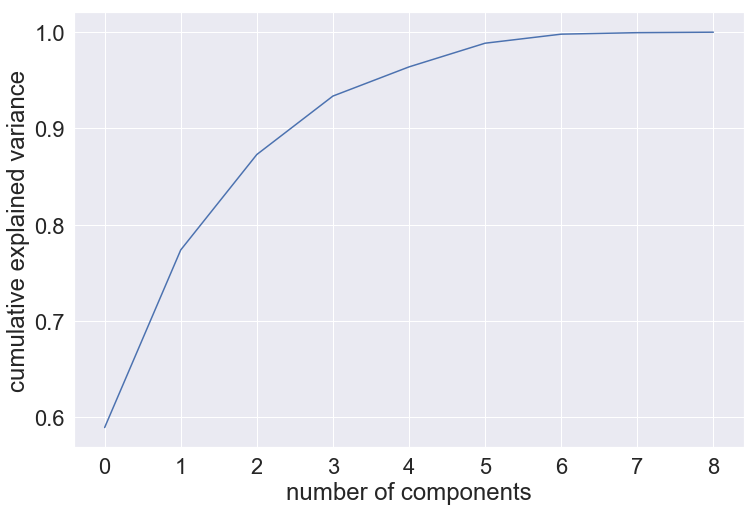

In [30]:
#Plotting the scree plot:
#plotting the cumulative variance vs the number of components using screeplot

%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [31]:
# Looks like only 4 components are enough to describe 94% of the variance in the dataset above.
# We'll choose 4 components for our modeling

In [32]:
#Understanding how the original 4 variables are loaded on the principal components. It can be verified from above as well.
col_names = list(numeric_df.columns)
pca_df = pd.DataFrame({'Feature':col_names, 'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3],'PC5':pca.components_[4],'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],'PC9':pca.components_[8]})
pca_df

#below table is showing the first 9 principal components and their corresponding values for each feature

,Feature,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,child_mort,-0.316392,0.476267,-0.150012,-0.148052,0.101995,0.196585,0.761267,0.006444,-0.004951
1,exports,0.342887,0.397311,-0.030574,0.449425,-0.038538,-0.038911,-0.013670,-0.055264,-0.717924
2,health,0.358535,0.155053,-0.075703,-0.599712,-0.493200,0.180699,-0.064616,0.430072,-0.130346
3,imports,0.344865,0.370781,-0.072174,0.461798,-0.252787,-0.012180,0.027182,0.131135,0.665687
4,income,0.380041,0.128384,0.145764,-0.154806,0.794075,-0.038147,-0.023113,0.393811,0.079011
5,inflation,-0.143085,0.221261,0.948419,-0.007628,-0.136423,0.108403,-0.022077,-0.006070,0.011281
6,life_expec,0.343857,-0.369820,0.196752,-0.018395,-0.154041,-0.586010,0.581208,0.002966,-0.031594
7,total_fer,-0.302842,0.459715,-0.077834,-0.213928,-0.020336,-0.753901,-0.273145,0.034293,0.023682
8,gdpp,0.399988,0.200624,0.010339,-0.364772,0.087501,0.045382,-0.044023,-0.799022,0.128464


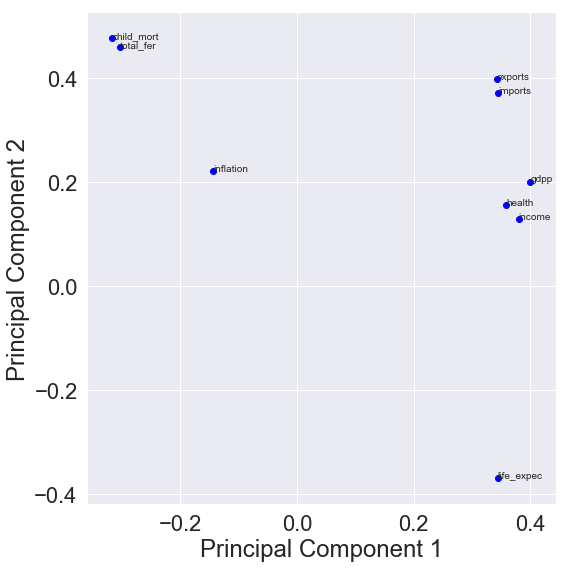

In [33]:
# Let's plot them to visualise how these features are loaded:

# Since this is a 2-D sheet , we can not plot the scatter plot between these four components directly.
# Hence,we wil go ahead and plot it for first 2 principal components which are most essential heere


# Let's plot them to visualise how these features are loaded
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pca_df.PC1, pca_df.PC2, color='blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()



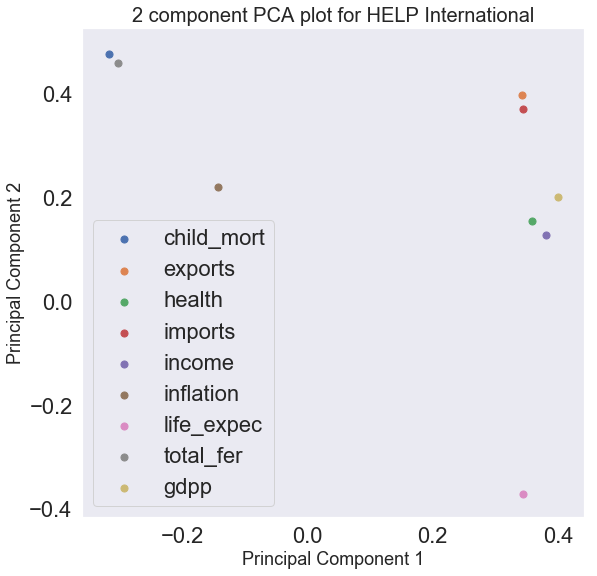

In [34]:
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 18)
ax.set_ylabel('Principal Component 2', fontsize = 18)
ax.set_title('2 component PCA plot for HELP International', fontsize = 20)
targets = ['child_mort', 'exports', 'health','imports','income','inflation','life_expec','total_fer','gdpp']
#colors = ['r', 'g', 'b']
colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(targets)))
for target, color in zip(targets,colors):
    indicesToKeep = pca_df['Feature'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'PC1']
               , pca_df.loc[indicesToKeep, 'PC2']
              
               , s = 50)
ax.legend(targets)
ax.grid()

In [35]:
# Analysis of the PC Plot between first two components:

# 1. For component1 : The parameters like life expectancy (life_expec), income (income), health (health), gdpp, exports and 
# imports are high for the "Principal Component1". Rest parameters are lesser.
# 2. For Principal Component 2 : The parameters like inflation, child mortality rate (child_mort) and (total_fer) total 
# fertility rate are higher along with the above parameter, But life expectancy is lower.

In [36]:
#Finally let's go ahead and do dimenstionality reduction using the two Principal Components:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)


In [37]:
pca_final_fit = pca_final.fit_transform(country_numeric_array)
pca_final_fit.shape

(167, 4)

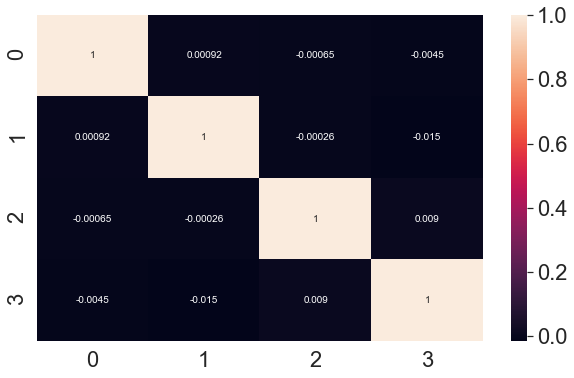

In [38]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(pca_final_fit.transpose())

#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,6))
sns.heatmap(corrmat,annot = True)

In [39]:
# As expected PCA has done quite well with very little to no correlation existing between the components.
# This suggests that we can use these components for next steps.

In [40]:
# Creating data-frame  :
pca_df = pd.DataFrame(data = pca_final_fit, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
pca_df.head()

,PC1,PC2,PC3,PC4
0,-2.636647,1.472085,-0.546500,0.237267
1,-0.023845,-1.435816,-0.009080,-0.442921
2,-0.459260,-0.678794,0.967852,-0.176389
3,-2.723581,2.176018,0.597794,0.438919
4,0.648777,-1.026498,-0.244170,-0.267513


In [41]:
## concatinate country datadframe to this new df:

pca_df = pd.concat([country_df_only,pca_df],axis=1)
pca_df.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.636647,1.472085,-0.546500,0.237267
1,Albania,-0.023845,-1.435816,-0.009080,-0.442921
2,Algeria,-0.459260,-0.678794,0.967852,-0.176389
3,Angola,-2.723581,2.176018,0.597794,0.438919
4,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513


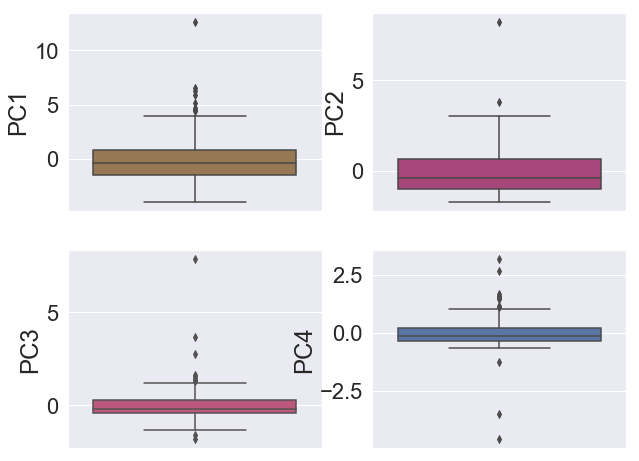

In [42]:
# Performing Outlier Analysis after PCA:

# plotting a box plot for each principal component 

plt.figure(figsize=(10,8))

#plt.title("Outlier Analysis of the Data")

plt.subplot(221)
sns.boxplot(y = pca_df.PC1,palette=("cubehelix"))

plt.subplot(222)
sns.boxplot(y = pca_df.PC2,palette=("magma"))

plt.subplot(223)
sns.boxplot(y = pca_df.PC3, palette=("plasma"))

plt.subplot(224)
sns.boxplot(y = pca_df.PC4)

plt.show()

In [43]:
# There are outiers in our data set for all the 4 components, which needs to be treated as clustering is sensitive to the 
# presence of the outliers in the data.


In [44]:
# Creating a cpoy of df 

hier_df = pca_df
hier_df.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.636647,1.472085,-0.546500,0.237267
1,Albania,-0.023845,-1.435816,-0.009080,-0.442921
2,Algeria,-0.459260,-0.678794,0.967852,-0.176389
3,Angola,-2.723581,2.176018,0.597794,0.438919
4,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513


In [45]:
# removing (statistical) outliers

# outlier treatment for Principal Component 1:
Q1 = pca_df.PC1.quantile(0.05)
Q3 = pca_df.PC1.quantile(0.95)
IQR = Q3 - Q1
grouped_df = pca_df[(pca_df.PC1 >= Q1 - 1.5*IQR) & (pca_df.PC1 <= Q3 + 1.5*IQR)]

# outlier treatment for Principal Component 2:
Q1 = pca_df.PC2.quantile(0.05)
Q3 = pca_df.PC2.quantile(0.95)
IQR = Q3 - Q1
pca_df = pca_df[(grouped_df.PC2 >= Q1 - 1.5*IQR) & (pca_df.PC2 <= Q3 + 1.5*IQR)]

# outlier treatment for Principal Component 3:
Q1 = pca_df.PC3.quantile(0.05)
Q3 = pca_df.PC3.quantile(0.95)
IQR = Q3 - Q1
pca_df = pca_df[(pca_df.PC3 >= Q1 - 1.5*IQR) & (pca_df.PC3 <= Q3 + 1.5*IQR)]

# outlier treatment for Principal Component 4:
Q1 = pca_df.PC4.quantile(0.05)
Q3 = pca_df.PC4.quantile(0.95)
IQR = Q3 - Q1
pca_df = pca_df[(pca_df.PC4 >= Q1 - 1.5*IQR) & (pca_df.PC4 <= Q3 + 1.5*IQR)]



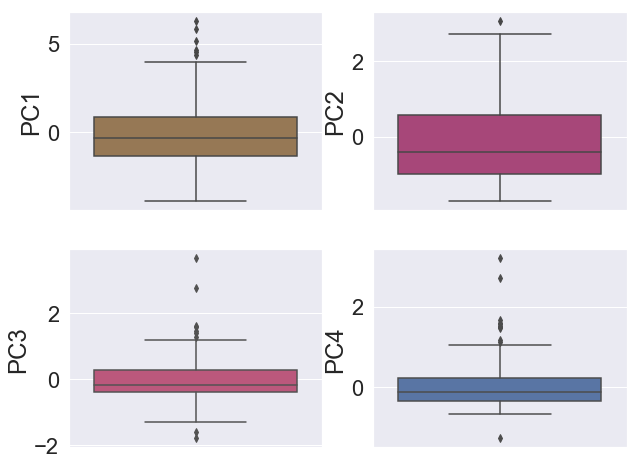

In [46]:
# Rechecking the result of outlier treatment 

plt.figure(figsize=(10,8))

#plt.title("Outlier Analysis of the Data")

plt.subplot(221)
sns.boxplot(y = pca_df.PC1,palette=("cubehelix"))

plt.subplot(222)
sns.boxplot(y = pca_df.PC2,palette=("magma"))

plt.subplot(223)
sns.boxplot(y = pca_df.PC3, palette=("plasma"))

plt.subplot(224)
sns.boxplot(y = pca_df.PC4)

plt.show()

In [47]:
# So we can see that the outliers are emiliminated now by the above box plots.

In [48]:
# Re-checking the shape of the dataframe:

pca_df.shape

(164, 5)

In [49]:
# As per the above information 3 countries have been removed from our dataframe during the outlier treatment.

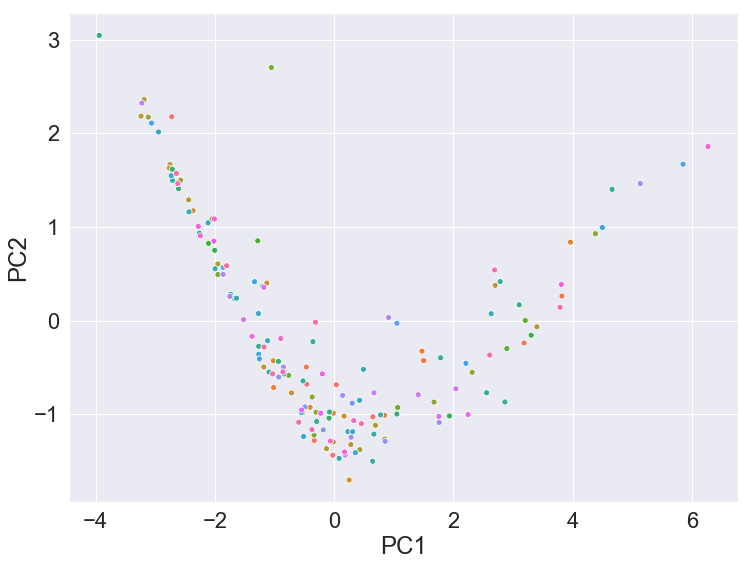

In [50]:
# one of the prime advatanges of PCA is that you can visualise high dimensional data
#Visualising using the scatterplot:

plt.figure(figsize=(12,9))
sns.scatterplot(x='PC1',y='PC2',data=pca_df,hue="country",legend=False)


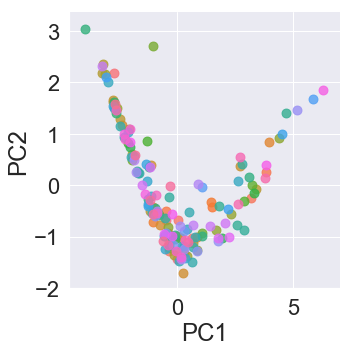

In [51]:
#Visualising the points on the PCs using the seaborns lmplot:

sns.lmplot( x="PC1", y="PC2",
  data=pca_df, 
  fit_reg=False, 
  hue='country', # color by cluster
  legend=False,
  scatter_kws={"s": 80}) # specify the point size


In [52]:
#Some clusters are already visible to us, but they does not seems to be very clear now.
#Let's go ahead and begin with the clustering process

In [53]:
# Dataframe to be used for Clustering:

pca_df2 = pca_df[['PC1','PC2','PC3','PC4']]

pca_df2.head()

,PC1,PC2,PC3,PC4
0,-2.636647,1.472085,-0.546500,0.237267
1,-0.023845,-1.435816,-0.009080,-0.442921
2,-0.459260,-0.678794,0.967852,-0.176389
3,-2.723581,2.176018,0.597794,0.438919
4,0.648777,-1.026498,-0.244170,-0.267513


In [54]:
#Calculating the Hopkins statistic:

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [55]:
# Calculating the Hopkins statistics score:

hopkins(pca_df2)

0.89240160559197

In [56]:
# Since the Hopkins score is ~0.87 , cluster tendency is very high for our data set.

# This is as par the below Hopkins stats guidelines:

#If the value is between {0.01, ...,0.3}, the data is regularly spaced.
#If the value is around 0.5, it is random.
#If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [57]:
# Creatiing copy of the dataframe:

pca_df3 = pca_df2
pca_df3.head()

,PC1,PC2,PC3,PC4
0,-2.636647,1.472085,-0.546500,0.237267
1,-0.023845,-1.435816,-0.009080,-0.442921
2,-0.459260,-0.678794,0.967852,-0.176389
3,-2.723581,2.176018,0.597794,0.438919
4,0.648777,-1.026498,-0.244170,-0.267513


In [58]:
#Silhouette Analysis

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(pca_df3)
    sse_.append([k, silhouette_score(pca_df3, kmeans.labels_)])


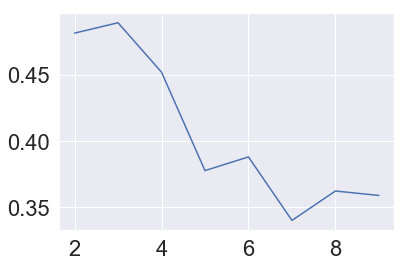

In [59]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

In [60]:
# Sum of Squared Distances

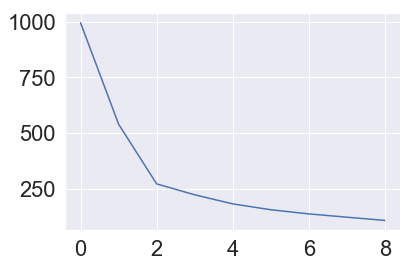

In [61]:
## From the above analysis we find that 3 seems to be a good number of clusters for K means algorithm
#Now let's proceed to the elbow curve method
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pca_df3)
    ssd.append(model_clus.inertia_)
    
# plot the SSDs for each n_clusters
# ssd    
plt.plot(ssd)

In [62]:
# From the elbow curve its suggesting 2 and 3 as the curve is bending at this point.
# But the Silhoutte analysis is suggesting as 3 , so we wil go with the final model with cluster number K=3 value

In [63]:
# silhouette analysis once again:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(pca_df3)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(pca_df3, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.4817803137425799
For n_clusters=3, the silhouette score is 0.48964509747394136
For n_clusters=4, the silhouette score is 0.36220999366396506
For n_clusters=5, the silhouette score is 0.37775918867685865
For n_clusters=6, the silhouette score is 0.37599283151403073
For n_clusters=7, the silhouette score is 0.3789906540033554
For n_clusters=8, the silhouette score is 0.3389513727257906


In [64]:
# based on Hopkins score we can cluster this dataset

# Silhoutte analysis and SSD suggest will choose the number of clusters to be 3. (k =3)

In [65]:
model_cluster2 = KMeans(n_clusters = 3, max_iter=50)
model_cluster2.fit(pca_df3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [66]:
# Let's add these newly created final 3 clusters formed into our dataset:

pca_df4=pca_df2
pca_df4.index = pd.RangeIndex(len(pca_df4.index))
dat_kmeans = pd.concat([pca_df4, pd.Series(model_cluster2.labels_)], axis=1)
dat_kmeans.columns = ['PC1', 'PC2','PC3','PC4','ClusterID']
dat_kmeans.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-2.636647,1.472085,-0.546500,0.237267,1
1,-0.023845,-1.435816,-0.009080,-0.442921,0
2,-0.459260,-0.678794,0.967852,-0.176389,0
3,-2.723581,2.176018,0.597794,0.438919,1
4,0.648777,-1.026498,-0.244170,-0.267513,0


In [67]:
# Checking the cluster count:
dat_kmeans['ClusterID'].value_counts()

0    88
1    47
2    29
Name: ClusterID, dtype: int64

In [68]:
# Hence there are 88 countries in cluster 1, 47 in cluster 2 and 29 in the 3rd cluster respectively

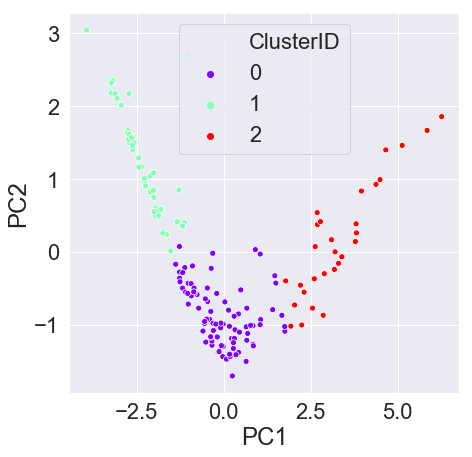

In [69]:
# Visualisation of the cluster formed :
plt.figure(figsize=(7,7))


sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',palette='rainbow',legend='full',data=dat_kmeans)

In [70]:
# So, basically we can see that there are three clusters which are formed here.

In [71]:
# Merging this dataframe with the original one:
pca_df5=pd.merge(country_df,dat_kmeans, left_index=True,right_index=True)
pca_df5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.636647,1.472085,-0.546500,0.237267,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.023845,-1.435816,-0.009080,-0.442921,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459260,-0.678794,0.967852,-0.176389,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.723581,2.176018,0.597794,0.438919,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.648777,-1.026498,-0.244170,-0.267513,0


In [72]:
pca_df6=pca_df5.drop(['PC1','PC2','PC3','PC4'],axis=1)
pca_df6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [73]:
#So we have performed the clustering using the PCs and have now allocated the clusterIDs back to each of the COUNTRIES

In [74]:
# Analysis of the clusters formed:

In [75]:
# Calculate the mean values with of each variable as per each ClusterID

child_mort_mean = pca_df6.groupby(['ClusterID']).child_mort.mean()
exports_mean = pca_df6.groupby(['ClusterID']).exports.mean()
health_mean = pca_df6.groupby(['ClusterID']).health.mean()
imports_mean = pca_df6.groupby(['ClusterID']).imports.mean()
income_mean = pca_df6.groupby(['ClusterID']).income.mean()
inflation_mean = pca_df6.groupby(['ClusterID']).inflation.mean()
life_expec_mean = pca_df6.groupby(['ClusterID']).life_expec.mean()
total_fer_mean = pca_df6.groupby(['ClusterID']).total_fer.mean()
gdpp_mean = pca_df6.groupby(['ClusterID']).gdpp.mean()

In [76]:
# Create a new dataframe with these calculated mean values

df_k1 = pd.concat([pd.Series([0,1,2]), child_mort_mean, exports_mean, health_mean, imports_mean, income_mean, inflation_mean, life_expec_mean, total_fer_mean, gdpp_mean], axis=1)
df_k1.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", "inflation_mean", "life_expec_mean", "total_fer_mean", "gdpp_mean"]
df_k1.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,26.501136,6718.155443,814.658539,5979.370307,16918.840909,8.231511,72.436364,2.509545,10975.034091
1,1,65.031915,5732.842722,667.455489,5132.682683,11116.829787,8.115340,64.974468,3.865745,8574.021277
2,2,28.958621,12990.540021,2523.125162,11409.714793,28950.482759,4.968000,74.551724,2.681379,27315.586207


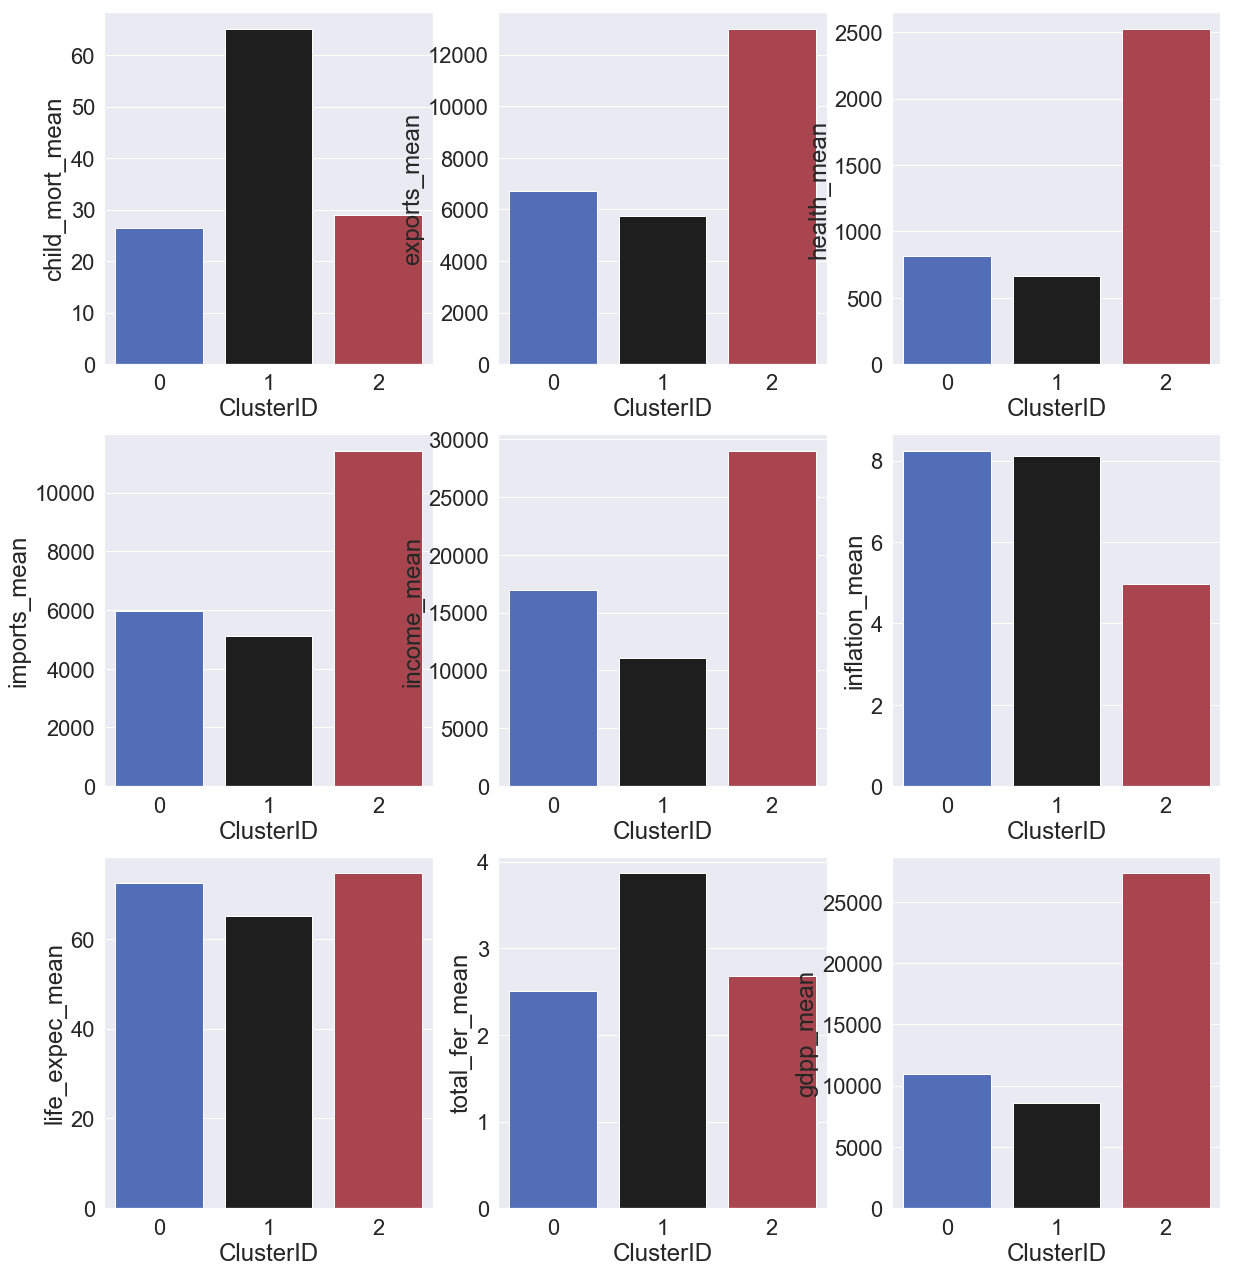

In [77]:
# Perforrming Bivariate Analysis for the clusterid and other parameters:

plt.figure(figsize=(20,22))

plt.subplot(331)
#plt.xlabel("Child Mortality")
sns.barplot(x=df_k1.ClusterID, y=df_k1.child_mort_mean,palette=("icefire"))

plt.subplot(332)
sns.barplot(x=df_k1.ClusterID, y=df_k1.exports_mean,palette=("icefire"))

plt.subplot(333)
sns.barplot(x=df_k1.ClusterID, y=df_k1.health_mean,palette=("icefire"))

plt.subplot(334)
sns.barplot(x=df_k1.ClusterID, y=df_k1.imports_mean,palette=("icefire"))

plt.subplot(335)
sns.barplot(x=df_k1.ClusterID, y=df_k1.income_mean,palette=("icefire"))

plt.subplot(336)
sns.barplot(x=df_k1.ClusterID, y=df_k1.inflation_mean,palette=("icefire"))

plt.subplot(337)
sns.barplot(x=df_k1.ClusterID, y=df_k1.life_expec_mean,palette=("icefire"))

plt.subplot(338)
sns.barplot(x=df_k1.ClusterID, y=df_k1.total_fer_mean,palette=("icefire"))

plt.subplot(339)
sns.barplot(x=df_k1.ClusterID, y=df_k1.gdpp_mean,palette=("icefire"))

plt.show()

In [78]:
# Checking the data in the different clusters:

pca_df6[pca_df6['ClusterID'] == 0].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
1,Albania,16.6,1145.20,267.895,1987.74,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.982,1400.44,12900,16.10,76.5,2.89,4460,0
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100,1.44,76.8,2.13,12200,0
5,Argentina,14.5,1946.70,834.300,1648.00,18700,20.90,75.8,2.37,10300,0
6,Armenia,18.1,669.76,141.680,1458.66,6700,7.77,73.3,1.69,3220,0


In [79]:
# Checking the data in the different clusters:

pca_df6[pca_df6['ClusterID'] == 1].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758,1
21,Botswana,52.5,2768.600,527.0500,3257.550,13300,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.810,57.9,5.87,575,1


In [80]:
# Checking the data in the different clusters:

pca_df6[pca_df6['ClusterID'] == 2].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,2
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,2
23,Brunei,10.5,23792.2,1002.52,9884.0,80600,16.700,77.1,1.84,35300,2
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,2


In [81]:
# Performing binning:

In [82]:
# Heirarchical Clustering - Single linkage:

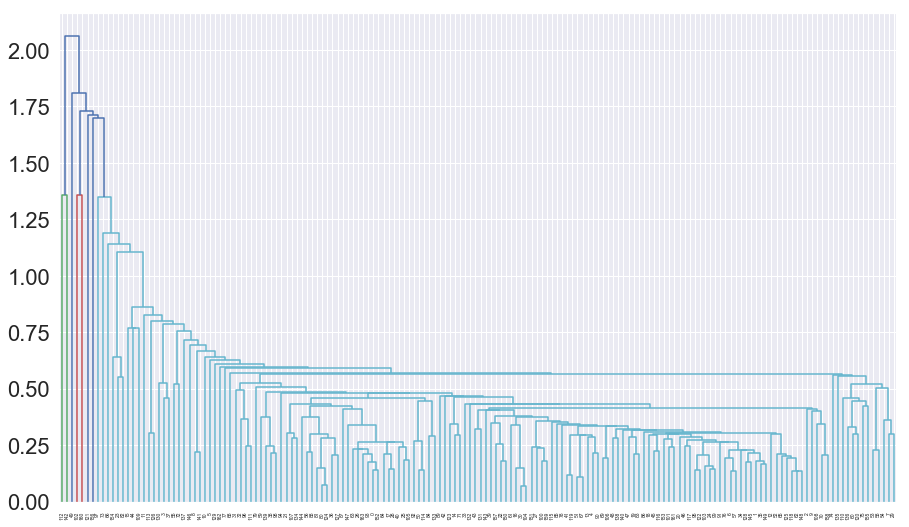

In [83]:
# single linkage dendrogram:

plt.figure(figsize=(15,9))
mergings = linkage(pca_df3, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

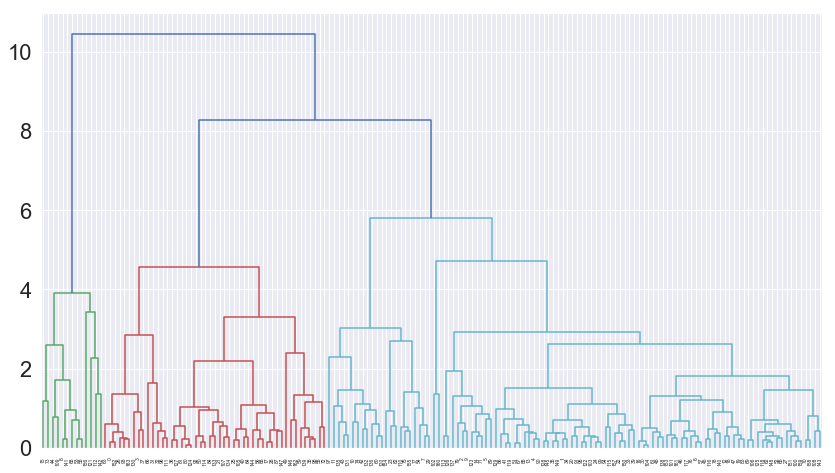

In [84]:
# complete linkage

plt.figure(figsize=(14,8))
mergings = linkage(pca_df3, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()


In [85]:
# 3 clusters if we cut at height of 5.5
cluster_labels = pd.Series(cut_tree(mergings, n_clusters=3).reshape(-1, ))
cluster_labels.shape
#hier_df.shape

(164,)

In [86]:
hier_df.shape

(167, 5)

In [87]:
hier_df.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.636647,1.472085,-0.546500,0.237267
1,Albania,-0.023845,-1.435816,-0.009080,-0.442921
2,Algeria,-0.459260,-0.678794,0.967852,-0.176389
3,Angola,-2.723581,2.176018,0.597794,0.438919
4,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513


In [88]:
# merging country cluster id and PC values to the dataset
hier_df = pd.concat([hier_df, cluster_labels], axis=1)
hier_df.columns = ['country','PC1', 'PC2', 'PC3', 'PC4', 'ClusterID']
#hier_df['ClusterID'] = hier_df['ClusterID'].astype(int)
#pca_df2['ClusterID'] = pca_df2.ClusterID.astype(int)
hier_df.head()


,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-2.636647,1.472085,-0.546500,0.237267,0.0
1,Albania,-0.023845,-1.435816,-0.009080,-0.442921,1.0
2,Algeria,-0.459260,-0.678794,0.967852,-0.176389,1.0
3,Angola,-2.723581,2.176018,0.597794,0.438919,0.0
4,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513,1.0
